* With your research proposal in hand, it's time to conduct the analysis in Jupyter. Provide a complete research report using the framework introduced in the previous module. The report should tell the story to your intended audience and should include compelling visualizations and actionable insights. Walk through the analysis using clean, reproducible code. Include plenty of notes and comments to guide others through your thinking.

* Along the way, consider issues in the experiment design. What bias might be influencing the analysis? Can you test for it? If you could collect new data in this domain, what changes would you make in the data collection process? What other variables or samples might be useful to test?

In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.multitest import multipletests
import ast
from datetime import datetime

%matplotlib inline

<IPython.core.display.Javascript object>

In [3]:
hot_100 = pd.read_csv("data/Hot_Stuff.csv")
genres = pd.read_excel("data/Hot_100_Audio_Features.xlsx")

<IPython.core.display.Javascript object>

In [4]:
genres["spotify_genre"].explode().value_counts()

[]                                                                                                                                                               2541
['contemporary country', 'country', 'country road']                                                                                                               315
['contemporary country', 'country', 'country road', 'modern country rock']                                                                                        279
['dance pop', 'pop', 'post-teen pop']                                                                                                                             252
['glee club', 'hollywood', 'post-teen pop']                                                                                                                       205
                                                                                                                                                                 ... 
['bl

<IPython.core.display.Javascript object>

In [5]:
genres = genres.drop_duplicates()

<IPython.core.display.Javascript object>

# Drop columns that are not needed

In [6]:
hot_100 = hot_100.drop(columns=["url"])

<IPython.core.display.Javascript object>

In [7]:
genres = genres.drop(
    columns=[
        "spotify_track_id",
        "spotify_track_preview_url",
        "spotify_track_duration_ms",
        "spotify_track_popularity",
        "danceability",
        "energy",
        "key",
        "loudness",
        "mode",
        "acousticness",
        "speechiness",
        "liveness",
        "instrumentalness",
        "valence",
        "tempo",
        "time_signature",
    ]
)

<IPython.core.display.Javascript object>

# Basic table description data

In [8]:
hot_100.shape

(320495, 9)

<IPython.core.display.Javascript object>

In [9]:
hot_100.isna().sum()

WeekID                        0
Week Position                 0
Song                          0
Performer                     0
SongID                        0
Instance                      0
Previous Week Position    30784
Peak Position                 0
Weeks on Chart                0
dtype: int64

<IPython.core.display.Javascript object>

In [10]:
hot_100.head()

,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
0,8/2/1958,1,Poor Little Fool,Ricky Nelson,Poor Little FoolRicky Nelson,1,NaN,1,1
1,12/2/1995,1,One Sweet Day,Mariah Carey & Boyz II Men,One Sweet DayMariah Carey & Boyz II Men,1,NaN,1,1
2,10/11/1997,1,Candle In The Wind 1997/Something About The Wa...,Elton John,Candle In The Wind 1997/Something About The Wa...,1,NaN,1,1
3,7/1/2006,1,Do I Make You Proud,Taylor Hicks,Do I Make You ProudTaylor Hicks,1,NaN,1,1
4,10/24/2009,1,3,Britney Spears,3Britney Spears,1,NaN,1,1


<IPython.core.display.Javascript object>

In [11]:
hot_100.dtypes

WeekID                     object
Week Position               int64
Song                       object
Performer                  object
SongID                     object
Instance                    int64
Previous Week Position    float64
Peak Position               int64
Weeks on Chart              int64
dtype: object

<IPython.core.display.Javascript object>

In [12]:
genres.shape

(28470, 6)

<IPython.core.display.Javascript object>

In [13]:
genres.isna().mean()

SongID                    0.000000
Performer                 0.000000
Song                      0.000000
spotify_genre             0.043133
spotify_track_album       0.166737
spotify_track_explicit    0.166526
dtype: float64

<IPython.core.display.Javascript object>

In [14]:
genres.head()

,SongID,Performer,Song,spotify_genre,spotify_track_album,spotify_track_explicit
0,"AdictoTainy, Anuel AA & Ozuna","Tainy, Anuel AA & Ozuna",Adicto,['pop reggaeton'],Adicto (with Anuel AA & Ozuna),0.0
1,The Ones That Didn't Make It Back HomeJustin M...,Justin Moore,The Ones That Didn't Make It Back Home,"['arkansas country', 'contemporary country', '...",NaN,NaN
2,ShallowLady Gaga & Bradley Cooper,Lady Gaga & Bradley Cooper,Shallow,"['dance pop', 'pop']",A Star Is Born Soundtrack,0.0
3,EnemiesPost Malone Featuring DaBaby,Post Malone Featuring DaBaby,Enemies,"['dfw rap', 'melodic rap', 'rap']",Hollywood's Bleeding,1.0
4,"Bacc At It AgainYella Beezy, Gucci Mane & Quavo","Yella Beezy, Gucci Mane & Quavo",Bacc At It Again,"['dfw rap', 'rap', 'southern hip hop', 'trap']",Bacc At It Again,1.0


<IPython.core.display.Javascript object>

In [15]:
genres.dtypes

SongID                     object
Performer                  object
Song                       object
spotify_genre              object
spotify_track_album        object
spotify_track_explicit    float64
dtype: object

<IPython.core.display.Javascript object>

# Fill null values

In [16]:
genres["spotify_track_album"].fillna(" ", inplace=True)
hot_100["Previous Week Position"].fillna(int(0), inplace=True)
genres["spotify_track_explicit"].fillna(999, inplace=True)

<IPython.core.display.Javascript object>

In [17]:
hot_100 = hot_100.astype({"Previous Week Position": int})

<IPython.core.display.Javascript object>

In [18]:
genres["spotify_genre"].fillna("[]", inplace=True)
genres["spotify_genre_list"] = genres["spotify_genre"].apply(ast.literal_eval)

<IPython.core.display.Javascript object>

In [19]:
genres = genres.astype({"spotify_track_explicit": int})

<IPython.core.display.Javascript object>

# Join the 2 tables

In [20]:
full_table = hot_100.merge(genres, left_on="SongID", right_on="SongID")
full_table

,WeekID,Week Position,Song_x,Performer_x,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart,Performer_y,Song_y,spotify_genre,spotify_track_album,spotify_track_explicit,spotify_genre_list
0,2/2/2019,1,7 Rings,Ariana Grande,7 RingsAriana Grande,1,0,1,1,Ariana Grande,7 Rings,"['dance pop', 'pop', 'post-teen pop']",thank,1,"[dance pop, pop, post-teen pop]"
1,5/25/2019,11,7 Rings,Ariana Grande,7 RingsAriana Grande,1,10,1,17,Ariana Grande,7 Rings,"['dance pop', 'pop', 'post-teen pop']",thank,1,"[dance pop, pop, post-teen pop]"
2,4/20/2019,4,7 Rings,Ariana Grande,7 RingsAriana Grande,1,3,1,12,Ariana Grande,7 Rings,"['dance pop', 'pop', 'post-teen pop']",thank,1,"[dance pop, pop, post-teen pop]"
3,6/1/2019,12,7 Rings,Ariana Grande,7 RingsAriana Grande,1,11,1,18,Ariana Grande,7 Rings,"['dance pop', 'pop', 'post-teen pop']",thank,1,"[dance pop, pop, post-teen pop]"
4,3/30/2019,1,7 Rings,Ariana Grande,7 RingsAriana Grande,1,1,1,9,Ariana Grande,7 Rings,"['dance pop', 'pop', 'post-teen pop']",thank,1,"[dance pop, pop, post-teen pop]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320602,8/25/1962,18,What's A Matter Baby (Is It Hurting You),Timi Yuro,What's A Matter Baby (Is It Hurting You)Timi Yuro,1,23,18,7,Timi Yuro,What's A Matter Baby (Is It Hurting You),"['adult standards', 'brill building pop']",The Best Of Timi Yuro,0,"[adult standards, brill building pop]"
320603,9/1/1962,12,What's A Matter Baby (Is It Hurting You),Timi Yuro,What's A Matter Baby (Is It Hurting You)Timi Yuro,1,18,12,8,Timi Yuro,What's A Matter Baby (Is It Hurting You),"['adult standards', 'brill building pop']",The Best Of Timi Yuro,0,"[adult standards, brill building pop]"
320604,9/8/1962,14,What's A Matter Baby (Is It Hurting You),Timi Yuro,What's A Matter Baby (Is It Hurting You)Timi Yuro,1,12,12,9,Timi Yuro,What's A Matter Baby (Is It Hurting You),"['adult standards', 'brill building pop']",The Best Of Timi Yuro,0,"[adult standards, brill building pop]"
320605,9/15/1962,31,What's A Matter Baby (Is It Hurting You),Timi Yuro,What's A Matter Baby (Is It Hurting You)Timi Yuro,1,14,12,10,Timi Yuro,What's A Matter Baby (Is It Hurting You),"['adult standards', 'brill building pop']",The Best Of Timi Yuro,0,"[adult standards, brill building pop]"


<IPython.core.display.Javascript object>

# Remove unnecessary columns, re-label columns

In [21]:
full_table = full_table.drop(columns=["Performer_y", "Song_y"])

<IPython.core.display.Javascript object>

In [22]:
full_table.rename(
    columns={
        "WeekID": "week",
        "Week Position": "week_pos",
        "Song_x": "song",
        "Performer_x": "artist",
        "SongID": "song_id",
        "Instance": "instance",
        "Previous Week Position": "prev_week_pos",
        "Peak Position": "peak_pos",
        "Weeks on Chart": "weeks_on_chart",
        "spotify_genre": "genre",
        "spotify_genre_list": "genre_list",
        "spotify_track_album": "album",
        "spotify_track_explicit": "explicit",
    },
    inplace=True,
)

<IPython.core.display.Javascript object>

# Format week to a date format

In [23]:
full_table["week"] = full_table["week"].apply(
    lambda x: datetime.strptime(x, "%m/%d/%Y")
)
full_table["week"] = pd.to_datetime(full_table["week"])

<IPython.core.display.Javascript object>

# Put month and year in separate columns

In [24]:
full_table["year"], full_table["month"] = (
    full_table["week"].dt.year,
    full_table["week"].dt.month,
)

<IPython.core.display.Javascript object>

# Analysis

In [25]:
full_table.groupby("explicit").count()

,week,week_pos,song,artist,song_id,instance,prev_week_pos,peak_pos,weeks_on_chart,genre,album,genre_list,year,month
explicit,,,,,,,,,,,,,,
0,249361,249361,249361,249361,249361,249361,249361,249361,249361,249361,249361,249361,249361,249361
1,31060,31060,31060,31060,31060,31060,31060,31060,31060,31060,31060,31060,31060,31060
999,40186,40186,40186,40186,40186,40186,40186,40186,40186,40186,40186,40186,40186,40186


<IPython.core.display.Javascript object>

In [26]:
top_song_limit = 50
top_songs = full_table[full_table["week_pos"] <= top_song_limit]
top_songs = top_songs.groupby(["song_id", "genre"]).mean()
top_songs = top_songs.reset_index()
top_songs

,song_id,genre,week_pos,instance,prev_week_pos,peak_pos,weeks_on_chart,explicit,year,month
0,"""Cherry Cherry"" from Hot August NightNeil Diamond","['adult standards', 'brill building pop', 'fol...",37.333333,1.0,41.500000,37.333333,6.5,0.0,1973.000000,4.333333
1,"""Joy"" Pt. IIsaac Hayes","['classic soul', 'disco', 'funk', 'jazz funk',...",35.142857,1.0,38.000000,33.428571,6.0,999.0,1974.000000,1.428571
2,"""Yep!""Duane Eddy His Twangy Guitar And The Rebels",[],40.500000,1.0,44.250000,34.000000,4.5,999.0,1959.000000,4.250000
3,#1Nelly,"['dance pop', 'hip hop', 'pop', 'pop rap', 'ra...",27.384615,1.0,28.384615,24.153846,11.0,1.0,2001.461538,6.923077
4,#9 DreamJohn Lennon,"['album rock', 'classic rock', 'folk rock', 'm...",24.100000,1.0,25.200000,19.900000,7.5,0.0,1975.000000,1.800000
...,...,...,...,...,...,...,...,...,...,...
15282,iSpyKYLE Featuring Lil Yachty,"['pop rap', 'rap']",19.857143,1.0,20.428571,11.214286,16.5,1.0,2017.000000,4.571429
15283,teachmeMusiq Soulchild,"['alternative r&b', 'dance pop', 'neo soul', '...",46.333333,1.0,48.000000,44.666667,13.0,0.0,2007.000000,8.000000
15284,whoa (mind in awe)XXXTENTACION,"['emo rap', 'miami hip hop']",37.000000,1.0,0.000000,37.000000,1.0,0.0,2018.000000,12.000000
15285,www.memoryAlan Jackson,"['contemporary country', 'country', 'country r...",48.000000,1.0,49.000000,47.200000,7.0,999.0,2000.000000,12.000000


<IPython.core.display.Javascript object>

In [27]:
genre_list = ["rap", "hip hop", "metal", "country", "pop"]

<IPython.core.display.Javascript object>

In [28]:
for genre in genre_list:
    top_songs[genre] = top_songs["genre"].str.contains(fr"\b{genre}\b")

<IPython.core.display.Javascript object>

In [29]:
top_songs.loc[top_songs["pop"], "genre_label"] = "pop"
top_songs.loc[top_songs["rap"] | top_songs["hip hop"], "genre_label"] = "rap_hiphop"
top_songs.loc[top_songs["metal"], "genre_label"] = "metal"
top_songs.loc[top_songs["country"], "genre_label"] = "country"

top_songs["genre_label"].value_counts()

pop           5421
rap_hiphop    1962
country       1705
metal          423
Name: genre_label, dtype: int64

<IPython.core.display.Javascript object>

# Graphs

In [30]:
pop = top_songs[top_songs["genre_label"] == "pop"]
rap_hiphop = top_songs[top_songs["genre_label"] == "rap_hiphop"]
country = top_songs[top_songs["genre_label"] == "country"]
metal = top_songs[top_songs["genre_label"] == "metal"]

<IPython.core.display.Javascript object>

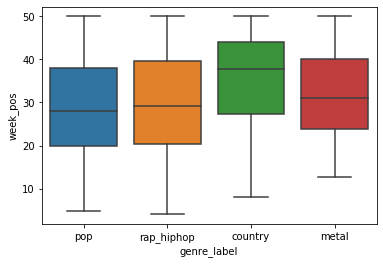

<IPython.core.display.Javascript object>

In [31]:
sns.boxplot("genre_label", "week_pos", data=top_songs)

[]

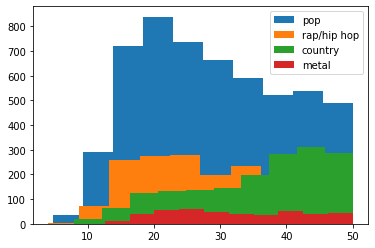

<IPython.core.display.Javascript object>

In [32]:
plt.hist(pop["week_pos"], label="pop")
plt.hist(rap_hiphop["week_pos"], label="rap/hip hop")
plt.hist(country["week_pos"], label="country")
plt.hist(metal["week_pos"], label="metal")
plt.legend()
plt.plot()

In [33]:
stats.ttest_ind(top_songs["explicit"], top_songs["week_pos"])

Ttest_indResult(statistic=34.27904515271302, pvalue=9.924177103822281e-253)

<IPython.core.display.Javascript object>

[]

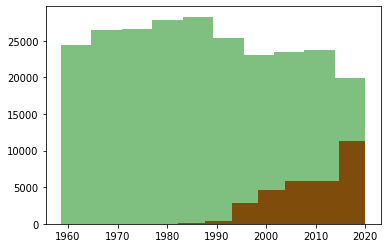

<IPython.core.display.Javascript object>

In [34]:
expl = full_table[full_table["explicit"] == 1]
not_expl = full_table[full_table["explicit"] == 0]

plt.hist(expl["week"], alpha=0.9, color="red")
plt.hist(not_expl["week"], alpha=0.5, color="green")
plt.plot()

In [35]:
country_expl = country[country["explicit"] == 1]
rap_hiphop_expl = rap_hiphop[rap_hiphop["explicit"] == 1]
metal_expl = metal[metal["explicit"] == 1]
pop_expl = pop[pop["explicit"] == 1]

country_not_expl = country[country["explicit"] == 0]
rap_hiphop_not_expl = rap_hiphop[rap_hiphop["explicit"] == 0]
metal_not_expl = metal[metal["explicit"] == 0]
pop_not_expl = pop[pop["explicit"] == 0]

<IPython.core.display.Javascript object>

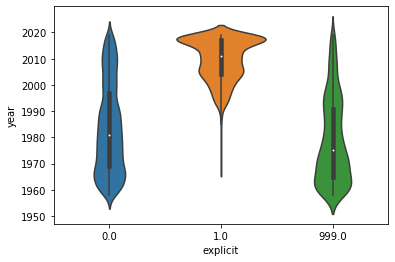

<IPython.core.display.Javascript object>

In [36]:
sns.violinplot(x="explicit", y="year", data=top_songs)
plt.show()

In [44]:
sns.violinplot(x="genre", y="year", data=top_songs)
plt.show()

KeyboardInterrupt: 

<IPython.core.display.Javascript object>

# Popularity before and after 1985

In [37]:
year_cut = 1985

<IPython.core.display.Javascript object>

In [38]:
rap_hiphop_before_1985 = rap_hiphop[rap_hiphop["year"] <= year_cut]
rap_hiphop_after_1985 = rap_hiphop[rap_hiphop["year"] > year_cut]
stats.ttest_ind(rap_hiphop_before_1985["week_pos"], rap_hiphop_after_1985["week_pos"])

Ttest_indResult(statistic=-0.35567394433445726, pvalue=0.7221230344849742)

<IPython.core.display.Javascript object>

In [39]:
metal_before_1985 = metal[metal["year"] <= year_cut]
metal_after_1985 = metal[metal["year"] > year_cut]
stats.ttest_ind(metal_before_1985["week_pos"], metal_after_1985["week_pos"])

Ttest_indResult(statistic=2.0590061503634662, pvalue=0.040108242932736377)

<IPython.core.display.Javascript object>

In [40]:
country_before_1985 = country[country["year"] <= year_cut]
country_after_1985 = country[country["year"] > year_cut]
stats.ttest_ind(country_before_1985["week_pos"], country_after_1985["week_pos"])

Ttest_indResult(statistic=-20.120281646624047, pvalue=5.99116081346349e-81)

<IPython.core.display.Javascript object>

In [41]:
pop_before_1985 = pop[pop["year"] <= year_cut]
pop_after_1985 = pop[pop["year"] > year_cut]
stats.ttest_ind(pop_before_1985["week_pos"], pop_after_1985["week_pos"])

Ttest_indResult(statistic=2.2432881258023833, pvalue=0.024918481764890452)

<IPython.core.display.Javascript object>

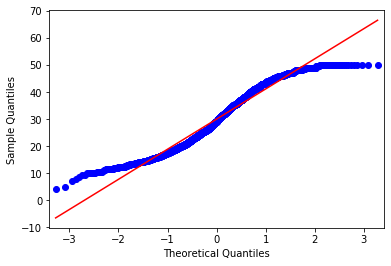

<IPython.core.display.Javascript object>

In [42]:
qqplot(rap_hiphop_after_1985["week_pos"], line="s")
plt.show()

In [43]:
qqplot(music["pledged"], line="s")
plt.show()

NameError: name 'music' is not defined

<IPython.core.display.Javascript object>